In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Load the dataset
df = pd.read_csv('appliance_energy.csv')

#Display the first few rows to understand the structure
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


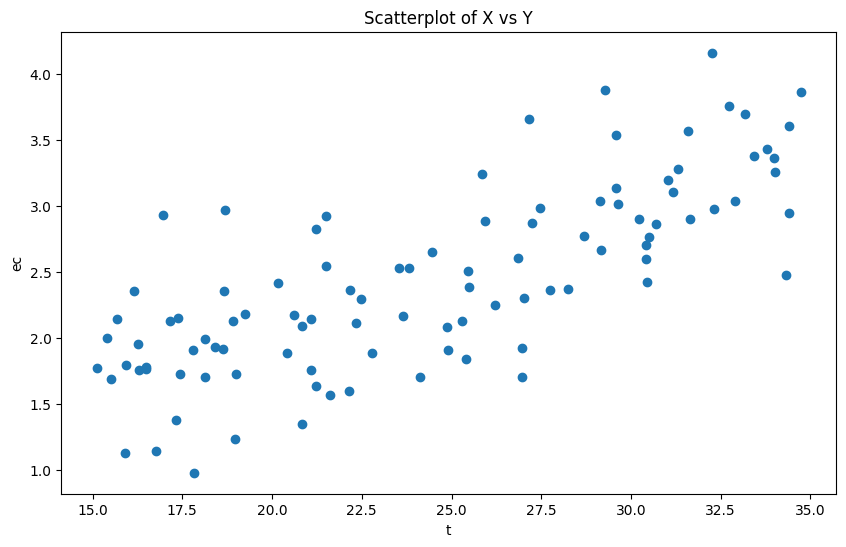

In [8]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'])
plt.xlabel('t')
plt.ylabel('ec')
plt.title('Scatterplot of X vs Y')
plt.show()

In [9]:

null_values = df.isnull().sum()

print(null_values)


Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [21]:
X = df['Temperature (°C)']
y = df['Energy Consumption (kWh)']

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train is 2-dimensional
if len(X_train.shape) == 1:
    X_train = X_train.values.reshape(-1, 1)  # If X_train is a pandas Series
elif isinstance(X_train, pd.Series):
    X_train = X_train.values.reshape(-1, 1)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
#Make predictions on the test set
y_pred = model.predict(X_test.values.reshape(-1, 1))



In [34]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [36]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.16342487842925055
R-squared: 0.6119478445218713


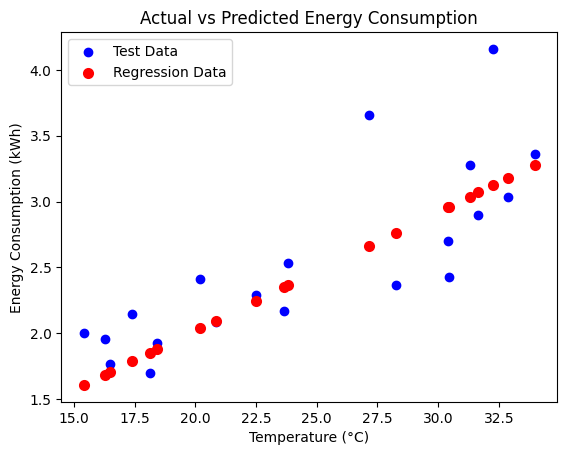

In [39]:
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.scatter(X_test, y_pred, color='red', linewidth=2, label='Regression Data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()

In [38]:
import joblib
#Save the model to a file
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [40]:
model = joblib.load('appliance_energy_model.pkl')

In [41]:
temp = np.array([[22.49]])

In [42]:
prediction = model.predict(temp)
print(f'Predicted energy consumption: ', prediction)

Predicted energy consumption:  [2.24530337]
